# Adaline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import ceil

from sklearn.preprocessing import StandardScaler

from data_access.iris import load_iris_data
from plots.raw_data import classes_scatter_plot
from utils.data_transformation import binarize_class_labels, standardize
from plots.learning_results import plot_2d_decision_boundary, plot_error_history

from neurons.adaline import Adaline
from neurons.adaline_mgd import AdalineMGD

## Dataset overview

In [2]:
iris_df = load_iris_data()

In [3]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


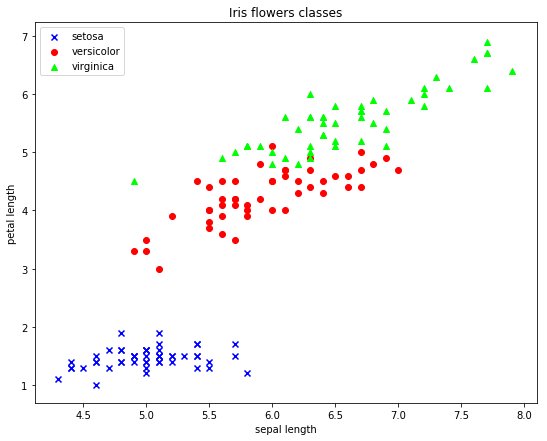

In [4]:
plt.figure(figsize=(9, 7))
classes_scatter_plot(iris_df)

In [5]:
setosa_versicolor = ["Iris-setosa", "Iris-versicolor"]

In [6]:
predictor_columns = ["sepal length", "petal length"]

In [7]:
set_ver_df = iris_df[iris_df["class"].isin(setosa_versicolor)].copy()
set_ver_df = binarize_class_labels(set_ver_df)

set_ver_df_s = standardize(set_ver_df, columns=predictor_columns)

In [8]:
train_X = set_ver_df[predictor_columns].values
train_y = set_ver_df["binary class"].values.reshape(-1, 1)

train_X_s = set_ver_df_s[predictor_columns].values

## Convergence speed

In [9]:
adaline_1 = Adaline(n_iter=10, learning_rate=0.01)
adaline_1.fit(train_X, train_y)

adaline_2 = Adaline(n_iter=10, learning_rate=0.0001)
adaline_2.fit(train_X, train_y)

adaline_3 = Adaline(n_iter=10, learning_rate=0.01)
adaline_3.fit(train_X_s, train_y)

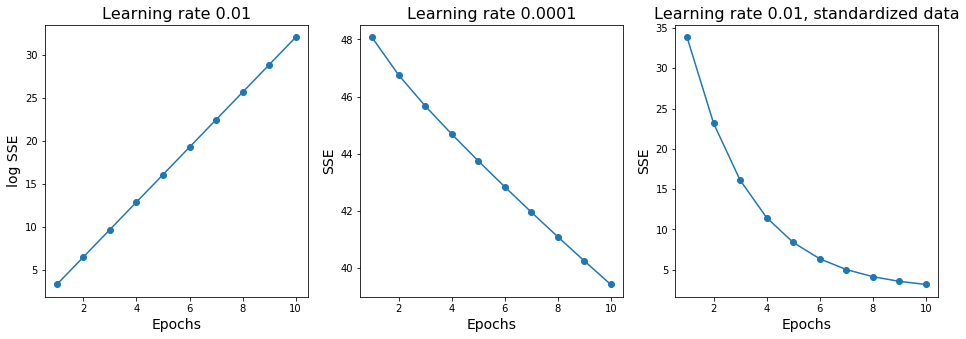

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

ax1.plot(range(1, len(adaline_1.cost_history_) + 1), np.log10(adaline_1.cost_history_), marker='o')
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('log SSE', fontsize=14)
ax1.set_title('Learning rate 0.01', fontsize=16)

ax2.plot(range(1, len(adaline_2.cost_history_) + 1), adaline_2.cost_history_, marker='o')
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('SSE', fontsize=14)
ax2.set_title('Learning rate 0.0001', fontsize=16)

ax3.plot(range(1, len(adaline_3.cost_history_) + 1), adaline_3.cost_history_, marker='o')
ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('SSE', fontsize=14)
ax3.set_title('Learning rate 0.01, standardized data', fontsize=16)

plt.show()

## Decision boundary

In [11]:
adaline = Adaline(n_iter=15, learning_rate=0.01)
adaline.fit(train_X_s, train_y)

In [12]:
print('b:', adaline.b_)
print('w:', adaline.w_)

b: 1.3655743202889406e-16
w: [[-0.12625616]
 [ 1.10479201]]


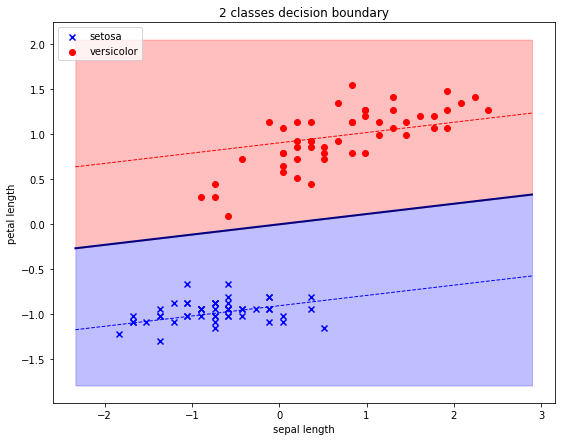

In [13]:
plt.figure(figsize=(9, 7))
plot_2d_decision_boundary(set_ver_df_s, adaline, support_vectors=True)

## Linearly non-separable classes

In [14]:
versicolor_virginica = ["Iris-versicolor", "Iris-virginica"]

In [15]:
ver_vir_df = iris_df[iris_df["class"].isin(versicolor_virginica)].copy()
ver_vir_df = binarize_class_labels(ver_vir_df)
ver_vir_df_s = standardize(ver_vir_df, columns=predictor_columns)

In [16]:
train_X_s = ver_vir_df_s[predictor_columns].values
train_y = ver_vir_df_s["binary class"].values.reshape(-1, 1)

In [17]:
adaline = Adaline(n_iter=15, learning_rate=0.01)
adaline.fit(train_X_s, train_y)

In [18]:
print('b:', adaline.b_)
print('w:', adaline.w_)

b: -6.716849298982199e-16
w: [[-0.42987879]
 [ 1.17196009]]


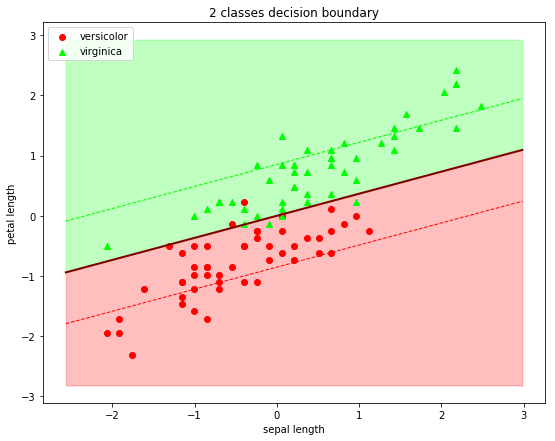

In [19]:
plt.figure(figsize=(9, 7))
plot_2d_decision_boundary(ver_vir_df_s, adaline, support_vectors=True)

## Stochastic & mini-batch gradient descent

In [20]:
adaline = Adaline(n_iter=15, learning_rate=0.01)
adaline.fit(train_X_s, train_y)

adaline_sgd = AdalineMGD(n_iter=15, learning_rate=0.01)
adaline_sgd.fit(train_X_s, train_y, batch_size=1, log_details=True)

adaline_mgd = AdalineMGD(n_iter=15, learning_rate=0.01)
adaline_mgd.fit(train_X_s, train_y, batch_size=16, log_details=True)

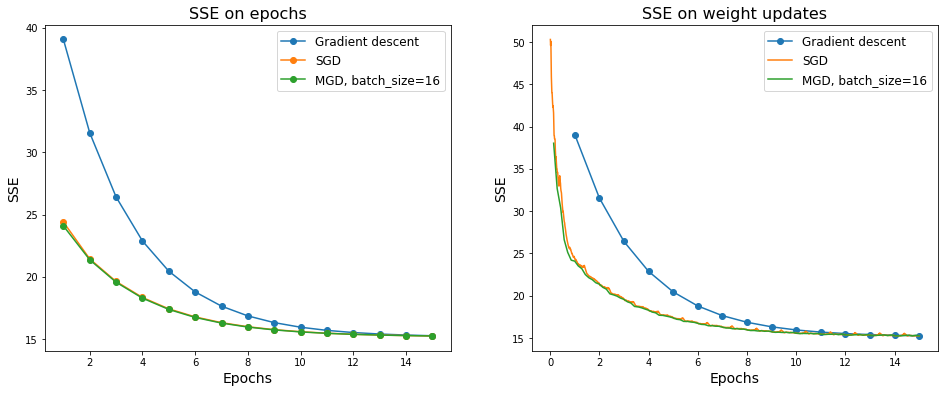

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

gd_range = range(1, len(adaline.cost_history_) + 1)

ax1.plot(gd_range, adaline.cost_history_, marker='o', label='Gradient descent')
ax1.plot(gd_range, adaline_sgd.cost_history_, marker='o', label='SGD')
ax1.plot(gd_range, adaline_mgd.cost_history_, marker='o', label='MGD, batch_size=16')

ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('SSE', fontsize=14)
ax1.legend(loc='upper right', fontsize=12)
ax1.set_title('SSE on epochs', fontsize=16)

n_iter = 15
sgd_step_size = 1 / 100
n_batches = ceil(100 / 16)
mgd_step_size = 1 / n_batches

sgd_range = np.arange(start=sgd_step_size, stop=n_iter + sgd_step_size, step=sgd_step_size)
mgd_range = np.arange(start=mgd_step_size, stop=n_iter + mgd_step_size, step=mgd_step_size)

ax2.plot(gd_range, adaline.cost_history_, marker='o', label='Gradient descent')
ax2.plot(sgd_range, adaline_sgd.cost_history_detailed_, label='SGD')
ax2.plot(mgd_range, adaline_mgd.cost_history_detailed_, label='MGD, batch_size=16')

ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('SSE', fontsize=14)
ax2.legend(loc='upper right', fontsize=12)
ax2.set_title('SSE on weight updates', fontsize=16)

plt.show()

In [22]:
i = 8

print('SSE')
print('Gradient descent:\t{:.4f}'.format(adaline.cost_history_[i]))
print('SGD:\t\t\t{:.4f}'.format(adaline_sgd.cost_history_[i]))
print('MGD:\t\t\t{:.4f}'.format(adaline_mgd.cost_history_[i]))

SSE
Gradient descent:	16.3145
SGD:			15.7492
MGD:			15.7289


In [23]:
adaline.fit(train_X_s, train_y)
adaline_sgd.fit(train_X_s, train_y, batch_size=1, log_details=False)
adaline_mgd.fit(train_X_s, train_y, batch_size=16, log_details=False)

In [24]:
print('Learning time')
print('Gradient descent:\t{:.4f}'.format(adaline.learning_time_))
print('SGD:\t\t\t{:.4f}'.format(adaline_sgd.learning_time_))
print('MGD:\t\t\t{:.4f}'.format(adaline_mgd.learning_time_))

Learning time
Gradient descent:	0.0020
SGD:			0.0570
MGD:			0.0050
